### A demo for pretraining with our CAE tool

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pickle
import time
import os

import sys
sys.setrecursionlimit(1000000)

import ConvAE
import utils

In [3]:
# load data
X_raw = []
num_grp = 8
for i in range(num_grp):
    fname = '../../BH12/data/BH12_171020/sample-BH-120-120-10-c3-gr{0}.pkl'.format(i)
    with open(fname, 'rb') as fp:
        datadict = pickle.load(fp)
        X_raw.append(datadict['data'])
    time.sleep(3)

# Combine and normalization
X_pre = np.vstack(X_raw)
del(X_raw)

In [4]:
rs = 120
X_tr = X_pre.reshape(-1,rs,rs,1).astype('float32')

# Construct the network
numclass = 2
encode_nodes = 64
cae = ConvAE.ConvAE(input_shape=X_tr.shape,
            kernel_size=[3,3,3,3,3],
            kernel_num = [8,8,16,32,32],
            fc_nodes=[], encode_nodes=encode_nodes,
            padding=('SAME','SAME'),
            stride=(2,2),
            numclass = numclass)
cae.cae_build()
cae.cnn_build(learning_rate=0.0005)

In [5]:
# Train the network
num_epochs = 20
learning_rate = 0.001
batch_size = 100
droprate = 0.5
cae.cae_train(data=X_tr, num_epochs=num_epochs, learning_rate=learning_rate,
              batch_size=batch_size, droprate=droprate)

[2017-12-13: 13:02:23] Training parameters

[2017-12-13: 13:02:23] Epochs: 20	Learning rate: 0.00

[2017-12-13: 13:02:23] Batch size: 100	Drop rate: 0.50

[2017-12-13: 13:02:54] Epoch: 001	Training loss: 0.001262	Validation loss: 0.001155
[2017-12-13: 13:03:24] Epoch: 002	Training loss: 0.001126	Validation loss: 0.001048
[2017-12-13: 13:03:55] Epoch: 003	Training loss: 0.000893	Validation loss: 0.000592
[2017-12-13: 13:04:25] Epoch: 004	Training loss: 0.000522	Validation loss: 0.000452
[2017-12-13: 13:04:56] Epoch: 005	Training loss: 0.000448	Validation loss: 0.000415
[2017-12-13: 13:05:25] Epoch: 006	Training loss: 0.000418	Validation loss: 0.000396
[2017-12-13: 13:05:56] Epoch: 007	Training loss: 0.000399	Validation loss: 0.000382
[2017-12-13: 13:06:27] Epoch: 008	Training loss: 0.000386	Validation loss: 0.000372
[2017-12-13: 13:06:57] Epoch: 009	Training loss: 0.000378	Validation loss: 0.000370
[2017-12-13: 13:07:28] Epoch: 010	Training loss: 0.000371	Validation loss: 0.000362
[2017

In [6]:
# save the pre-trained network
foldname = "./net-pretrained"
name = "pretrained.pkl"
netname = "model-pretrain.ckpt"
if os.path.exists(foldname):
    os.system("rm -r %s" % (foldname))
os.mkdir(foldname)
cae.cae_save(namepath=os.path.join(foldname, name),
             netpath=os.path.join(foldname, netname))

(10, 120, 120, 1)


/home/mzx/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


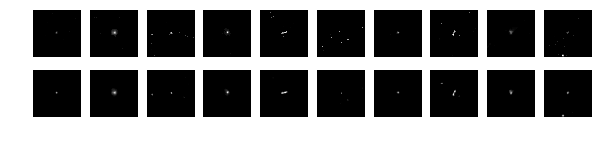

In [7]:
## Show the reconstructed results
n_examples = 10
idx = np.random.permutation(len(X_tr))
test_xs = X_tr[idx[0:n_examples],:,:,:].astype('float32')

recon = cae.cae_test(img=test_xs)
print(recon.shape)

def gen_norm(img):
    return (img-img.min())/(img.max() - img.min())

fig, axs = plt.subplots(2, n_examples, figsize=(n_examples, 2))
for example_i in range(n_examples):
    # raw
    axs[0][example_i].imshow(
        np.reshape(test_xs[example_i, :], (rs, rs)), cmap='gray')
    axs[0][example_i].axis('off')
    # learned
    axs[1][example_i].imshow(
        np.reshape(
            np.reshape(recon[example_i, ...], (rs**2,)),
            (rs, rs)), cmap='gray')
    axs[1][example_i].axis('off')

fig.show()
plt.draw()